¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

Introducción

En este proyecto, trabajaremos con nuestro cliente Zyfra; empresa dedicada al desarrollo de soluciones de eficiencia para la industria pesada. Le ayudaremos a crear un modelo de machine learning que haga predicciones sobre la cantidad de oro que es extraido de los minerales del mismo. Para desarrollar este proyecto, la empresa nos ah compartido los datos de extracción y purificación del oro provenientes de sus procesos. El fin último de nuestro modelo es optimizar la producción y eliminnar los parámetros no rentables.

Paso 0: Importación de librerias

Vamos a importar todas la librerias que necesitaremos a lo largo del proyecto.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (mean_absolute_error, r2_score)

Paso 1: Preparación de los datos

Vamos a comprobar que los datos sean correctos. Para ello, utilizaremos las instrucciones del proyecto.

Paso 1.1: Abrir los archivos y examinar los datos

In [2]:
# Importamos los datos sobre la extracción y purificación y creamos un DataFrame para cada uno de los archivos.
gold_rec_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_rec_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_rec_full = pd.read_csv('/datasets/gold_recovery_full.csv')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo, usaste una celda independiente para importar las librerías y otra para leer los datos.
</div>

In [3]:
# Veamos un resumen de los DataFrames, así como una muestra de los mismos.
print(gold_rec_train.info())
display(gold_rec_train.sample(5))
print()
print(gold_rec_test.info())
display(gold_rec_test.sample(5))
print()
print(gold_rec_full.info())
display(gold_rec_full.sample(5))

# Utilizaremos el método describe() para conocer algunas estadísticas del DataFrame.
print()
display(gold_rec_train.describe())
display(gold_rec_test.describe())
display(gold_rec_full.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
16839,2018-08-17 14:59:59,3.861031,12.441737,6.667624,44.339835,72.001394,8.752653,3.258726,10.303485,1.742921,...,23.025088,-501.311668,20.031273,-500.674430,17.953446,-500.681679,13.013927,-500.258257,20.012671,-505.750254
1880,2016-04-02 08:00:00,3.866997,10.061724,9.549200,48.652035,65.700563,7.684810,1.973128,10.694932,2.321729,...,12.093241,-500.340497,11.938360,-500.229905,12.026350,-501.007808,9.968731,-500.965465,19.972329,-500.626633
2546,2016-04-30 01:59:59,6.411381,8.698408,8.952149,44.914788,60.228738,11.702941,2.473502,7.685168,4.872494,...,14.982845,-499.530154,12.984456,-499.445393,9.017541,-499.038431,9.024583,-500.002342,16.005078,-499.025277
9889,2017-07-02 00:59:59,4.654979,9.385511,6.437050,47.613835,59.124873,8.135278,3.018538,7.212189,2.904306,...,17.950932,-500.295550,12.933957,-380.344667,17.984947,-500.411449,13.006627,-500.087168,14.997455,-499.986642
9357,2017-06-09 20:59:59,4.794026,10.601666,7.626995,44.962062,53.249467,8.287219,3.074177,9.886977,3.202278,...,15.024116,-498.781281,9.942337,-379.367099,14.983493,-499.130754,9.986358,-499.700428,14.994216,-499.074484



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_cle

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
574,2016-09-24 22:59:59,NaN,NaN,7.680000,NaN,0.095184,-798.586463,0.023821,-800.025322,0.050351,...,0.000000,-750.729341,0.000000,-749.732292,-0.129463,-797.666781,0.718490,-800.018121,0.239688,-799.875220
2833,2016-12-28 01:59:59,106.310839,8.040097,7.300000,1.104259,1673.314669,-500.755639,1696.479263,-501.336341,1694.682943,...,17.012478,-499.128434,15.000049,-498.298818,12.281115,-499.542903,11.995165,-499.624747,21.022874,-498.945470
1056,2016-10-15 00:59:59,180.114699,15.002873,6.888333,0.912620,1649.692515,-498.872488,1702.237765,-500.580887,1702.020569,...,15.972785,-499.045559,11.932342,-499.561613,9.471783,-498.690880,7.982300,-499.755106,16.965876,-498.220405
1085,2016-10-16 05:59:59,194.310619,14.988114,6.990000,1.005058,1623.596285,-500.711620,1700.065048,-499.928073,1697.224749,...,15.991157,-501.846609,12.097399,-499.727467,9.384582,-500.323333,10.069250,-500.330523,17.016703,-499.963275
653,2016-09-28 05:59:59,NaN,NaN,7.680000,0.001323,0.000000,-797.141440,0.000000,-799.980965,0.049197,...,0.000000,-799.645548,0.000000,-799.818529,-0.171969,-798.059761,0.659384,-800.000507,0.207948,-799.884977



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4563,2016-07-23 02:59:59,5.529067,8.105291,13.154968,45.916967,72.749647,10.814616,2.263693,11.529297,2.741713,...,14.952925,-401.103716,4.934490,-400.824568,10.053161,-401.413320,4.938410,-400.129582,22.970355,-500.789081
12283,2017-06-09 18:59:59,4.353124,10.549314,7.882396,45.931837,58.001574,8.820588,3.396716,9.142065,3.322711,...,14.979595,-500.586283,10.104680,-380.841617,14.989152,-499.599197,10.000472,-499.988931,14.980927,-499.497602
13830,2017-08-13 05:59:59,4.367122,11.727818,6.061679,45.661246,63.189674,6.648397,3.057288,11.290367,2.332728,...,14.524830,-500.256321,10.976921,-399.835691,14.023283,-499.519258,11.016348,-500.417369,15.010459,-500.564476
7544,2016-11-24 07:59:59,5.883031,9.326155,11.840526,45.501340,67.868122,11.131264,2.830075,10.862931,3.673415,...,17.989892,-499.577769,15.992185,-500.038440,19.051793,-499.612434,11.970669,-499.767689,22.018061,-500.927026
9755,2017-02-24 10:59:59,6.685812,10.989239,17.357118,42.381347,75.700663,12.617491,4.340268,9.566640,3.647424,...,25.036054,-401.912751,23.008913,-400.588428,23.011583,-449.917220,19.970043,-449.875545,25.018972,-499.946200


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos.
</div>

Hallazgos del paso 1.1

1.- Todos los DataFrames tienen valores ausentes que dependiendo del análisis que deseemos realizar, tendremos que tratarlos a estos de diferente manera; ya sea eliminándolos o rellenandolos con la media o la mediana del resto de los valores de su columna correspondiente.

Paso 1.2: Comprobar que el cálculo de la recuperación sea correcto. Calcular la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encontrar el EAM entre los cálculos y los valores de la característica. Facilitar los resultados.

In [4]:
# Para el cálculo necesitaremos las características: rougher.output.concentrate_au, rougher.input.feed_au
# y rougher.output.tail_au del DataFrame gold_rec_train. Como algunas de estas características contienen valores ausentes,
# los rellenaremos con la media o la mediana del resto de sus valores correspondientes, según convenga más.

# Para definir con que valores sustituir los valores ausentes en la columna 'rougher.output.concentrate_au', veremos si hay 
# valores atípicos. 
avg_rougher_output_concentrate_au = gold_rec_train['rougher.output.concentrate_au'].mean()
med_rougher_output_concentrate_au = gold_rec_train['rougher.output.concentrate_au'].median()
print(f"La media del concentrado rougher es: {avg_rougher_output_concentrate_au:.2f}")
print(f"La mediana del concentrado rougher es: {med_rougher_output_concentrate_au:.2f}")
print()

# Como si hay diferenia entre la media y la mediana de los valores de la columna'rougher.output.concentrate_au', 
# podemos concluir que si hay valores atípicos en esta, por lo que rellenaremos los valores ausentes de la columna anterior, 
# con la mediana de la misma.

# Utilizamos SimpleImputer para rellenar los valores faltantes con la mediana en la columna 'rougher.output.concentrate_au'.
imputer = SimpleImputer(strategy='median')
gold_rec_train['rougher.output.concentrate_au'] = imputer.fit_transform(gold_rec_train[['rougher.output.concentrate_au']])

# gold_rec_test['rougher.output.concentrate_au'] = imputer.transform(gold_rec_test[['rougher.output.concentrate_au']])


# Para definir con que valores sustituir los valores ausentes en la columna 'rougher.input.feed_au', veremos si hay 
# valores atípicos. 
avg_rougher_input_feed_au = gold_rec_train['rougher.input.feed_au'].mean()
med_rougher_input_feed_au = gold_rec_train['rougher.input.feed_au'].median()
print(f"La media de la mezcla de mineral de oro es: {avg_rougher_input_feed_au:.2f}")
print(f"La mediana de la mezcla de mineral de oro es: {med_rougher_input_feed_au:.2f}")
print()

# Como no hay gran diferenia entre la media y la mediana de los valores de la columna'rougher.input.feed_au', 
# podemos concluir que no hay valores atípicos en esta, por lo que rellenaremos los valores ausentes de la columna anterior, 
# con la media de la misma.

# Utilizamos SimpleImputer para rellenar los valores faltantes con la media en la columna 'rougher.input.feed_au'.
imputer = SimpleImputer(strategy='mean')
gold_rec_train['rougher.input.feed_au'] = imputer.fit_transform(gold_rec_train[['rougher.input.feed_au']])

# Para definir con que valores sustituir los valores ausentes en la columna 'rougher.output.tail_au', veremos si hay 
# valores atípicos. 
avg_rougher_output_tail_au = gold_rec_train['rougher.output.tail_au'].mean()
med_rougher_output_tail_au = gold_rec_train['rougher.output.tail_au'].median()
print(f"La media de la cola rougher post flotación es: {avg_rougher_output_tail_au:.2f}")
print(f"La mediana de la cola rougher post flotación es: {med_rougher_output_tail_au:.2f}")
print()

# Como no hay gran diferenia entre la media y la mediana de los valores de la columna'rougher.output.tail_au', 
# podemos concluir que no hay valores atípicos en esta, por lo que rellenaremos los valores ausentes de la columna anterior, 
# con la media de la misma.

# Utilizamos SimpleImputer para rellenar los valores faltantes con la media en la columna 'rougher.output.tail_au'.
imputer = SimpleImputer(strategy='mean')
gold_rec_train['rougher.output.tail_au'] = imputer.fit_transform(gold_rec_train[['rougher.output.tail_au']])

# Ahora vamos a hacer los calculos de recuperación para la característica rougher.output.recovery.
gold_rec_train['rougher.output.recovery.calculated'] = ((gold_rec_train['rougher.output.concentrate_au']*(gold_rec_train['rougher.input.feed_au']-gold_rec_train['rougher.output.tail_au']))/(gold_rec_train['rougher.input.feed_au']*(gold_rec_train['rougher.output.concentrate_au']-gold_rec_train['rougher.output.tail_au'])))*100

# Creamos una máscara sin NaN ni inf en ninguna de las columnas.
mask = (~gold_rec_train['rougher.output.recovery'].isna()) & (~gold_rec_train['rougher.output.recovery.calculated'].isna()) \
        & (~np.isinf(gold_rec_train['rougher.output.recovery'])) & (~np.isinf(gold_rec_train['rougher.output.recovery.calculated']))

# Filtramos los valores válidos
rougher_output_recovery = gold_rec_train.loc[mask, 'rougher.output.recovery']
rougher_output_recovery_calculated = gold_rec_train.loc[mask, 'rougher.output.recovery.calculated']

# Calculamos el Error Absoluto Medio (EAM).
mae = mean_absolute_error(rougher_output_recovery, rougher_output_recovery_calculated)
print(f"MAE: {mae}")

# Eliminamos del DataFrame de entrenamiento la columna "rougher.output.recovery.calculated" que creamos para validar el
# cálculo pasos atrás, porque más adelante creará problemas para complementar el DataFrame de prueba.
gold_rec_train = gold_rec_train.drop(columns=['rougher.output.recovery.calculated'])

La media del concentrado rougher es: 17.40
La mediana del concentrado rougher es: 19.64

La media de la mezcla de mineral de oro es: 7.17
La mediana de la mezcla de mineral de oro es: 7.44

La media de la cola rougher post flotación es: 1.76
La mediana de la cola rougher post flotación es: 1.75

MAE: 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se obtuvieron correctamente las métricas de cada una de las etapas se realizó adecuadamente, me gustó el buen manejo de los prints para mostrar la información correspondiente.
</div>

Conclusión del paso 1.2: el error absoluto medio de nuestros cálculos y los valores del conjunto de datos para la característica rougher.output.recovery es muy cercano a cero, lo que significa que nuestro calculos se asemejan mucho a los valores del conjunto, casí son iguales. 

Paso 1.3: Analizar las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [5]:
# Vamos a ver cuales características si están en el conjunto de entrenamiento, pero no están en el conjunto de prueba.
# Y además veamos que tipos de datos son.
only_in_train = list(set(gold_rec_train.columns) - set(gold_rec_test.columns))
print("Columnas que si están en el conjunto de entrenamiento, pero no están en el conjunto de prueba")
print()
print(gold_rec_train[only_in_train].dtypes)
print()

# Vamos a ver cuales características si están en el conjunto completo, pero no están en el conjunto de prueba.
# Y además veamos que tipos de datos son.
only_in_full = list(set(gold_rec_full.columns) - set(gold_rec_test.columns))
print("Columnas que si están en el conjunto completo, pero no están en el conjunto de prueba")
print()
print(gold_rec_train[only_in_full].dtypes)
print()

# Veamos las diferencias entre las anteriores comparativas
difference_train_full = list(set(only_in_train).symmetric_difference(set(only_in_full)))
print("Columnas distintas entre ambos:", difference_train_full)

Columnas que si están en el conjunto de entrenamiento, pero no están en el conjunto de prueba

primary_cleaner.output.tail_ag                        float64
primary_cleaner.output.concentrate_ag                 float64
secondary_cleaner.output.tail_sol                     float64
primary_cleaner.output.tail_pb                        float64
rougher.output.concentrate_ag                         float64
primary_cleaner.output.concentrate_sol                float64
final.output.concentrate_pb                           float64
final.output.tail_pb                                  float64
secondary_cleaner.output.tail_au                      float64
final.output.concentrate_ag                           float64
final.output.tail_au                                  float64
rougher.output.tail_pb                                float64
final.output.tail_ag                                  float64
rougher.output.concentrate_pb                         float64
primary_cleaner.output.tail_au       

Conclusiones del paso 1.3: Las columnas que tiene el conjunto de entrenamiento y que no tiene el conjunto de prueba son iguales a las columnas que tiene el conjunto completo y que no tiene el conjunto de prueba. En total 34 columnas y todas tienen valores flotantes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, encontraste las características que no están en el conjunto de prueba.
</div>

Paso 1.4: Realizar el preprocesamiento de datos.

In [6]:
# Agregamos la columna "date" a las columnas que queremos agregar.
date_mas_only_in_train = ['date'] + only_in_train

# Complementamos el DataFrame de prueba con las características que si tiene el DataFrame de entrenamiento,
# pero que el DataFrame de prueba no las tiene.
gold_rec_test= gold_rec_test.merge(
    gold_rec_full[date_mas_only_in_train],
    on='date',
    how='left'
)

# Ahora eliminamos la columna "date" tanto del DataFrame de entrenamiento como del de prueba porque esta columna 
# no aporta valor al modelo de Machine Learning y solo puede crear confusiones.
gold_rec_train = gold_rec_train.drop(columns=['date'])
gold_rec_test = gold_rec_test.drop(columns=['date'])

# Aplicamos KNNImputer para rellenar los valore faltantes tanto del DataFrame de entrenamiento como del de prueba. 
imputer = KNNImputer(n_neighbors=3, weights="uniform")
gold_rec_train_imp = pd.DataFrame(imputer.fit_transform(gold_rec_train), columns=gold_rec_train.columns)
gold_rec_test_imp = pd.DataFrame(imputer.transform(gold_rec_test), columns=gold_rec_test.columns)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Se han procesado correctamente los datos.
</div>

Paso 2: Analizar los datos

Vamos a analizar los datos en busca de patrones, a partir de las concentraciones de las sustancias y el tamaño de las partículas.

Paso 2.1: Observar cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

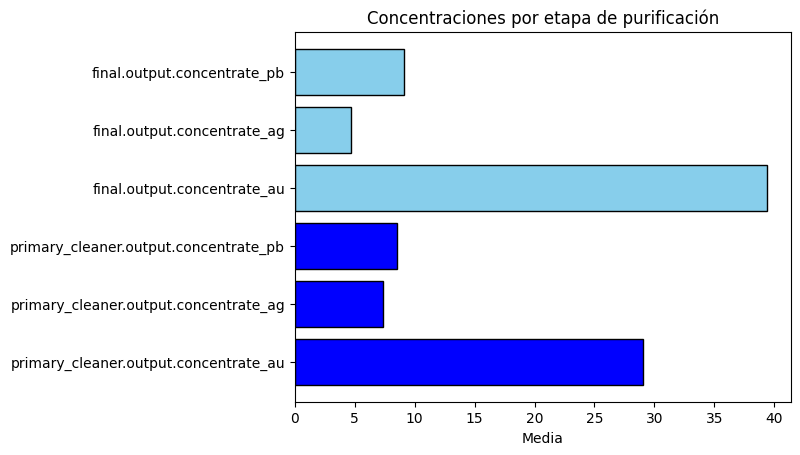

In [7]:
# Realizaremos un gráfico de barras donde compararemos las concentraciones de Au, Ag y Pb, después de cada una de las dos
# etapas de purificación.
columnas_0 = ['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb']
valores_0 = gold_rec_train_imp[columnas_0].mean()
plt.barh(
    columnas_0,
    valores_0,
    color='blue',
    edgecolor='black',
    align='center',
)
columnas_1 = ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']
valores_1 = gold_rec_train_imp[columnas_1].mean()
plt.barh(
    columnas_1,
    valores_1,
    color='skyblue',
    edgecolor='black',
    align='center',
)
plt.title('Concentraciones por etapa de purificación')
plt.xlabel('Media')
plt.show()


Hallazgos del paso 2.1

1.- La concentración de oro (Au) incrementó de una media de 29 a casi 40, de una etapa a otra.

2.- Para la plata (Ag) la concentración disminuyó de una media de 7 a casi 5, de una etapa a otra.

3.- Y en el caso del plomo (Pb), pareciera que no hubieron cambios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena gráfica de barras, se han comparado correctamente las concentraciones de cada uno de los métales.
</div>

Paso 2.2: Comparar las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

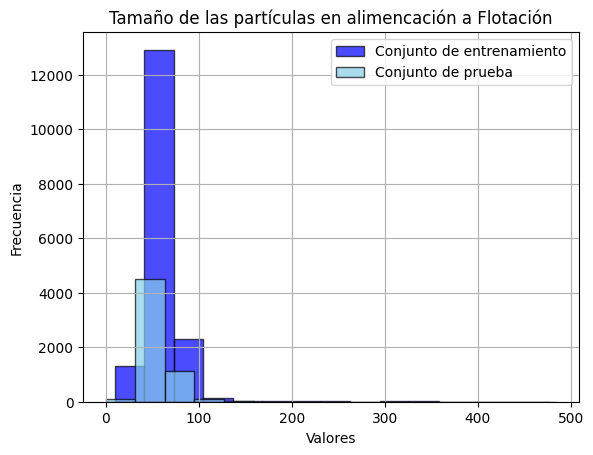

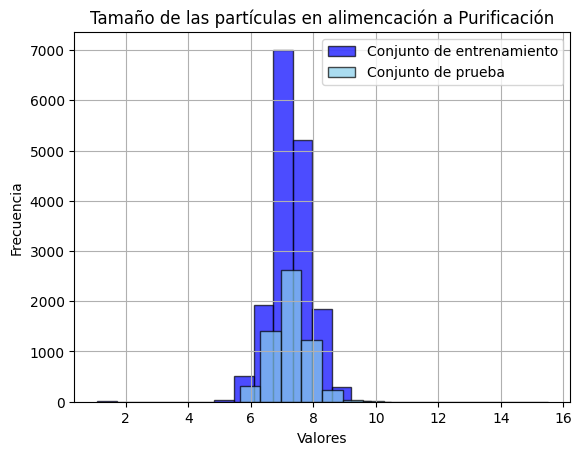

In [8]:
# Vamos a graficar las distribuciones de los tamaños de las partículas tando del conjunto de entrenamiento, como del de
# prueba, mediante un histograma. Comencemos con la alimentación al proceso de flotación.
plt.hist(
    gold_rec_train_imp['rougher.input.feed_size'],
    bins=15,
    color='blue',
    edgecolor='black',
    alpha=0.7,
    label='Conjunto de entrenamiento'
)
plt.hist(
    gold_rec_test_imp['rougher.input.feed_size'],
    bins=15,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    label='Conjunto de prueba'
)
plt.title('Tamaño de las partículas en alimencación a Flotación')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Ahora hagamos lo mismo para la alimentación al proceso de purificación
plt.hist(
    gold_rec_train_imp['primary_cleaner.input.feed_size'],
    bins=15,
    color='blue',
    edgecolor='black',
    alpha=0.7,
    label='Conjunto de entrenamiento'
)
plt.hist(
    gold_rec_test_imp['primary_cleaner.input.feed_size'],
    bins=15,
    color='skyblue',
    edgecolor='black',
    alpha=0.7,
    label='Conjunto de prueba'
)
plt.title('Tamaño de las partículas en alimencación a Purificación')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Muy buenos histogramas! Se puede comparar adecuadamente los conjuntos de prueba y entrenamiento. Como consejo, en lugar de realziar un histograma por frecuencia sería bueno tomar las proporciones, para que no afecte el hecho de que ambos grupos son de diferente tamaño.
</div>

Halazgos del paso 2.2

1.- Las distribuciones de los tamaños de las partículas son similares en ambos conjuntos.

2.- La frecuencia es mayor en el conjunto de entrenamiento que el de prueba al tener éste más muetras.

3.- El tamaño de las partículas deciende casi diez veces después del proceso de flotación.

Paso 2.3: Considerar las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿Merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

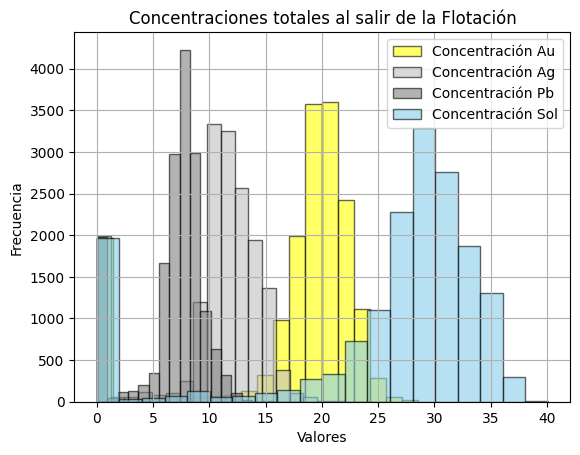

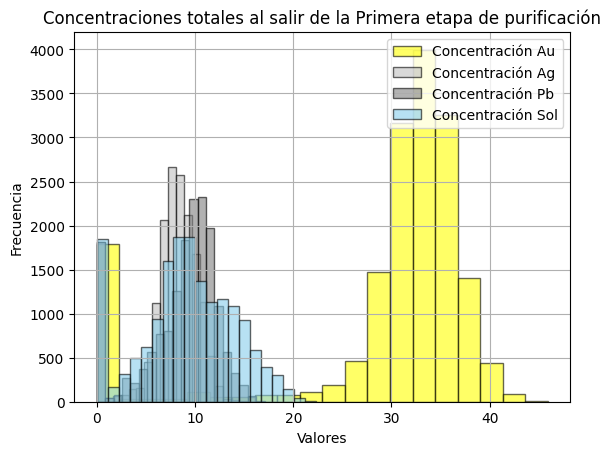

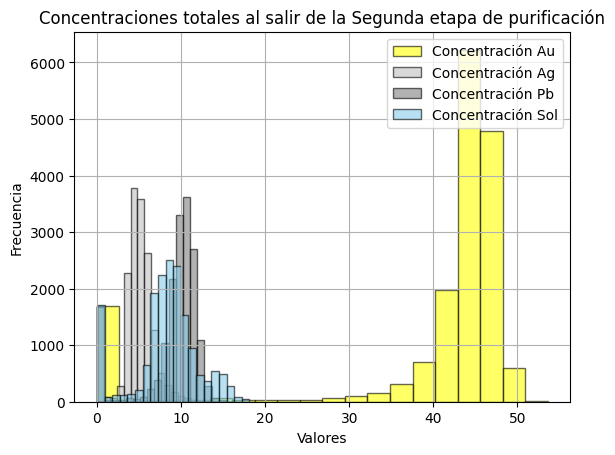

In [9]:
# Grafiquemos las distribuciones de las concentraciones totales de todas las sustancias (Au, Ag, Pb y Sol), a la salida de
# las etapas: 1.- Flotación, 2.- Primera etapa de purificación y 3.- Segunda etapa de purificación.

# Comencemos con la distribucion de las concentraciones totales de todas las sustancias a la salida de la Flotación. 
plt.hist(
    gold_rec_train_imp['rougher.output.concentrate_au'],
    bins=20,
    color='yellow',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Au'
)
plt.hist(
    gold_rec_train_imp['rougher.output.concentrate_ag'],
    bins=20,
    color='silver',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Ag'
)
plt.hist(
    gold_rec_train_imp['rougher.output.concentrate_pb'],
    bins=20,
    color='grey',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Pb'
)
plt.hist(
    gold_rec_train_imp['rougher.output.concentrate_sol'],
    bins=20,
    color='skyblue',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Sol'
)
plt.title('Concentraciones totales al salir de la Flotación')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Continuaremos con la distribucion de las concentraciones totales de todas las sustancias a la salida de la Primera etapa
# de purificación.
plt.hist(
    gold_rec_train_imp['primary_cleaner.output.concentrate_au'],
    bins=20,
    color='yellow',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Au'
)
plt.hist(
    gold_rec_train_imp['primary_cleaner.output.concentrate_ag'],
    bins=20,
    color='silver',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Ag'
)
plt.hist(
    gold_rec_train_imp['primary_cleaner.output.concentrate_pb'],
    bins=20,
    color='grey',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Pb'
)
plt.hist(
    gold_rec_train_imp['primary_cleaner.output.concentrate_sol'],
    bins=20,
    color='skyblue',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Sol'
)
plt.title('Concentraciones totales al salir de la Primera etapa de purificación')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

# Finalizamos con la distribucion de las concentraciones totales de todas las sustancias a la salida de la Segunda etapa
# de purificación.
plt.hist(
    gold_rec_train_imp['final.output.concentrate_au'],
    bins=20,
    color='yellow',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Au'
)
plt.hist(
    gold_rec_train_imp['final.output.concentrate_ag'],
    bins=20,
    color='silver',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Ag'
)
plt.hist(
    gold_rec_train_imp['final.output.concentrate_pb'],
    bins=20,
    color='grey',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Pb'
)
plt.hist(
    gold_rec_train_imp['final.output.concentrate_sol'],
    bins=20,
    color='skyblue',
    edgecolor='black',
    alpha=0.6,
    label='Concentración Sol'
)
plt.title('Concentraciones totales al salir de la Segunda etapa de purificación')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, me gustó que usaste colores relacionados con cada metal para poder distinguirlos. Muy bien.
</div>

Hallazgos del paso 2.3

1.- Conforme pasan las etapas, la concentración del oro incrementa y eso es lo que se espera.

2.- En todas las etapas hay valores de concentración atípicos para todas las sustancias, dichos valores son inferiores a una concentración aproximada de 3 y valdría el esfuerzo eliminar los registros cuya concentración de las sustancias sea igual o menor a ese valor.

In [10]:
# Vamos a eliminar los registros cuya concentración de las sustancias sea igual o menor a 3, esto tanto en el conjunto de
# validación como en el conjunto de prueba.

# Comencemos con las concentraciones a la salida de la etapa de flotación.
rougher = ['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_sol']
gold_rec_train_imp = gold_rec_train_imp[~(gold_rec_train_imp[rougher].le(3).any(axis=1))].reset_index(drop=True)
gold_rec_test_imp = gold_rec_test_imp[~(gold_rec_test_imp[rougher].le(3).any(axis=1))].reset_index(drop=True)

# Continuemos con las concentraciones a la salida de la Primera etapa de purificación.
primary = ['primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol']
gold_rec_train_imp = gold_rec_train_imp[~(gold_rec_train_imp[primary].le(3).any(axis=1))].reset_index(drop=True)
gold_rec_test_imp = gold_rec_test_imp[~(gold_rec_test_imp[primary].le(3).any(axis=1))].reset_index(drop=True)

# Finalizaremos con las concentraciones a la salida de la Segunda etapa de purificación.
final = ['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol']
gold_rec_train_imp = gold_rec_train_imp[~(gold_rec_train_imp[final].le(3).any(axis=1))].reset_index(drop=True)
gold_rec_test_imp = gold_rec_test_imp[~(gold_rec_test_imp[final].le(3).any(axis=1))].reset_index(drop=True)

In [11]:
# Ya que hemos eliminado todos los valores necesarios, entonces cómo último paso del preprocesamiento de datos, vamos a
# escalar los valores numéricos para que todos tengan la misma magnitud, tanto para el DataFrame de entrenamiento, como
# el DataFrame de prueba.
scaler_std = StandardScaler()
gold_rec_train_imp_std = pd.DataFrame(scaler_std.fit_transform(gold_rec_train_imp), columns=gold_rec_train_imp.columns)
gold_rec_test_imp_std = pd.DataFrame(scaler_std.transform(gold_rec_test_imp), columns=gold_rec_test_imp.columns)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El escalado de los datos se realizó correctamente.
</div>

Paso 3: Construye el modelo

Vamos a crar las métricas para nuestro modelo y después a probar diferentes modelos de regresión lineal y a evaluerlos mediante una validación cruzada.

Paso 3.1: Escribir una función para calcular el valor final de sMAPE.

In [12]:
# Creamos una función para calcular el SMAPE final.
def final_smape (rougher_target_valid, rougher_pred, final_target_valid, final_pred):
    smape_rougher_recovery = np.mean(2 * np.abs(rougher_target_valid - rougher_pred) / (np.abs(rougher_target_valid) + np.abs(rougher_pred))) * 100
    smape_final_recovery = np.mean(2 * np.abs(final_target_valid - final_pred) / (np.abs(final_target_valid) + np.abs(final_pred))) * 100
    final_smape = (0.25 * smape_rougher_recovery) + (0.75 * smape_final_recovery)
    return final_smape

Paso 3.2: Entrenar diferentes modelos. Evaluarlos aplicando la validación cruzada. Elegir el mejor modelo y probarlo utilizando la muestra de prueba. Facilitar los resultados.

In [22]:
# Primero separaremos las características y objetivos tanto para rougher.output.recovery, como para final.output.recovery
# del conjunto de entrenamiento.
rougher_target = gold_rec_train_imp_std['rougher.output.recovery']
rougher_features = gold_rec_train_imp_std.drop('rougher.output.recovery', axis=1)

final_target = gold_rec_train_imp_std['final.output.recovery']
final_features = gold_rec_train_imp_std.drop('final.output.recovery', axis=1)

# Vamos a probar diferentes modelos y los evaluaremos con una validación cruzada.
arbol = DecisionTreeRegressor(max_depth=3, random_state=42)  # Limitamos la profundidad a 3 para evitar sobreajuste
bosque = RandomForestRegressor(random_state=54321, n_estimators=5, max_depth=3)
reg_lin = LinearRegression()

# Creamos una función para probarlos todos.
def cross_val (model, features, target, blocks):
    scores = cross_val_score(model, features, target, cv=blocks)
    final_score = sum(scores)/len(scores)
    return f"puntuación media de la evaluación del modelo:{final_score:.2f}" 

# Veamos las evaluaciones de los modelos tanto para rougher.output.recovery, como para final.output.recovery.
print("Rougher recovery")
print("Arbol,", cross_val(arbol, rougher_features, rougher_target, 5))
print("Bosque,", cross_val(bosque, rougher_features, rougher_target, 5))
print("Regresión,", cross_val(reg_lin, rougher_features, rougher_target, 5))
print()
print("Final recovery")
print("Arbol,", cross_val(arbol, final_features, final_target, 5))
print("Bosque,", cross_val(bosque, final_features, final_target, 5))
print("Regresión,", cross_val(reg_lin, final_features, final_target, 5))

Rougher recovery
Arbol, puntuación media de la evaluación del modelo:0.18
Bosque, puntuación media de la evaluación del modelo:0.65
Regresión, puntuación media de la evaluación del modelo:-2.04

Final recovery
Arbol, puntuación media de la evaluación del modelo:0.34
Bosque, puntuación media de la evaluación del modelo:0.68
Regresión, puntuación media de la evaluación del modelo:0.71


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Se obtuvieron correctamente las métricas del recovery.
</div>

Hallazgos de las validaciones cruzadas

1.- Se utilizaron los mismos hiper-parámetros en las evaluaciones tanto con los valores de rougher recovery como de final recovery, esto para los modelos de arbol de decisión y bosque aleatorio.

2.- Para la predicción de rougher recovery el mejor modelo resultó ser el bosque aleatorio.

3.- Para la predicción de final recovery el mejor modelo resultó ser la regresión lineal.

Ahora podemos utilizar los modelos con los mejores resultados en las predicciones correspondientes.

In [35]:
# Comencemos separando los conjuntos de entrenamiento y prueba para rougher recovery.
rougher_target_train = gold_rec_train_imp_std['rougher.output.recovery']
rougher_features_train = gold_rec_train_imp_std.drop('rougher.output.recovery', axis=1)
rougher_target_valid = gold_rec_test_imp_std['rougher.output.recovery']
rougher_features_valid = gold_rec_test_imp_std.drop('rougher.output.recovery', axis=1)

# Ahora utilicemos el modelo seleccionado.
bosque.fit(rougher_features_train, rougher_target_train)
rougher_pred = bosque.predict(rougher_features_valid)

# Separemos los conjuntos de entrenamiento y prueba para final recovery.
final_target_train = gold_rec_train_imp_std['final.output.recovery']
final_features_train = gold_rec_train_imp_std.drop('final.output.recovery', axis=1)
final_target_valid = gold_rec_test_imp_std['final.output.recovery']
final_features_valid = gold_rec_test_imp_std.drop('final.output.recovery', axis=1)

# Ahora utilicemos el modelo seleccionado.
reg_lin.fit(final_features_train, final_target_train)
final_pred = reg_lin.predict(final_features_valid)

# Calculamos el SMAPE final.
print(final_smape (rougher_target_valid, rougher_pred, final_target_valid, final_pred))

196.34169456846755


Hallazgos del paso 3.2

A pesar de los esfuerzos realizados, el rsultado final de SMAPE es elevado e inclusive supera el 100%.

Conoclusiones

A lo largo del proyecto conocimos el proceso de extracción del oro y validamos que los datos estén preparados para los modelos a elegir y finalmente elegimos los modelos que mejor evaluados estuvieron con la validación cruzada, sin embargo, el resultado de SMAPE final no fue el esperado.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buenas conclusiones, basadas en lo realizado a lo largo del proyecto. Se podrían completar un poco más hablando de recomendaciones o de los procesos realizados para tratar los datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu proyecto, está bastante completo y bien realizado. Me gustó especialmente como usaste los prints para mostrar la información más importante con respecto a las métricas de los modelos. Bien hecho.
    
Solo realicé unos comentarios amarillos, pero son opcionales. Tu proyecto está aprobado.
    
Éxito en los siguientes sprints.
    
Saludos, Marcos.
</div>